In [4]:
import pinocchio as pin
import numpy as np
import sys
import os
from os.path import dirname, join, abspath 
 
pkg_path = "C:\\Users\\rafael\\Projects\\Quadruped\\optimization\\"
urdf_path = join(pkg_path, "example-robot-data/robots/solo_description/robots/solo12.urdf")

# Load URDF. This creates a RobotWrapper that contains both the read-only model and the data:
robot = pin.RobotWrapper.BuildFromURDF(
    urdf_path, package_dirs = [pkg_path], root_joint = pin.JointModelFreeFlyer()
)

In [5]:
# !pip install matplotlib
import time
import matplotlib.pyplot as plt

In [6]:
robot.setVisualizer(
    pin.visualize.MeshcatVisualizer(robot.model, robot.collision_model, robot.visual_model)
)
robot.initViewer()
robot.loadViewerModel()

q0 = pin.neutral(robot.model)
robot.display(q0)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7001/static/


In [66]:
len(q0)

19

In [5]:
robot.model

Nb joints = 14 (nq=19,nv=18)
  Joint 0 universe: parent=0
  Joint 1 root_joint: parent=0
  Joint 2 FL_HAA: parent=1
  Joint 3 FL_HFE: parent=2
  Joint 4 FL_KFE: parent=3
  Joint 5 FR_HAA: parent=1
  Joint 6 FR_HFE: parent=5
  Joint 7 FR_KFE: parent=6
  Joint 8 HL_HAA: parent=1
  Joint 9 HL_HFE: parent=8
  Joint 10 HL_KFE: parent=9
  Joint 11 HR_HAA: parent=1
  Joint 12 HR_HFE: parent=11
  Joint 13 HR_KFE: parent=12

In [6]:
robot.model.getJointId("FR_KFE")

7

In [8]:
type(robot.model.joints[1])

pinocchio.pinocchio_pywrap.JointModel

In [8]:
def get_q_off(robot, joint: str) -> int:
    joint_id = robot.model.getJointId(joint)
    return sum(robot.model.joints[idx].nq for idx in range(joint_id - 1))

def get_v_off(robot, joint: str) -> int:
    joint_id = robot.model.getJointId(joint)
    return sum(robot.model.joints[idx].nv for idx in range(joint_id - 1))

def spinni_boi():
    import time 
    from copy import deepcopy
    
    cur_t = 0
    period = 2  # 1 / rps
    
    while True:
        angle = (cur_t % period) / period * (2 * np.pi)
        
        q = deepcopy(q0)
    
        joint_id = robot.model.getJointId("FR_KFE")
        index = sum(robot.model.joints[idx].nq for idx in range(joint_id - 1))
                    
        q[index] = angle
        robot.display(q)
        
        time.sleep(0.01)
        cur_t += 0.01

In [9]:
robot.rebuildData()
fixed_base = robot.buildReducedRobot(
    list_of_joints_to_lock=list(set(robot.model.names) - {"universe", "FR_KFE"})
)

fixed_base.setVisualizer(
    pin.visualize.MeshcatVisualizer(fixed_base.model, fixed_base.collision_model, fixed_base.visual_model)
)
fixed_base.initViewer()
fixed_base.loadViewerModel()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7001/static/


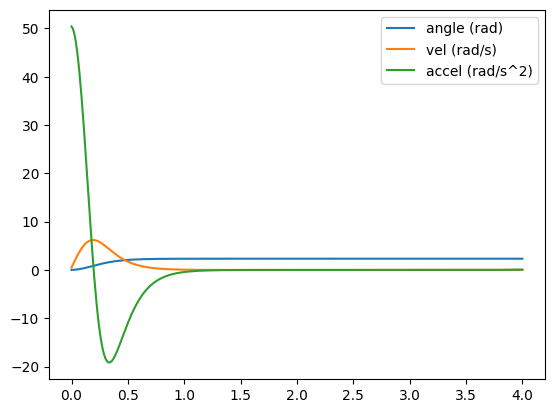

In [13]:
q0 = pin.neutral(fixed_base.model)
fixed_base.display(q0)

q, v = pin.neutral(fixed_base.model), pin.utils.zero(fixed_base.nv)
t, dt = 0, 0.01

tau = pin.utils.zero(fixed_base.nv)
tau[get_v_off(fixed_base, "FR_KFE")] = 0.027350121333861

h_pos, h_vel, h_acc = [], [], []

while t < 4:
    accel = pin.aba(
        fixed_base.model,
        fixed_base.data,
        q, v, tau
    )

    h_acc.append((t, accel[0]))
    
    v += accel * dt
    h_vel.append((t, v[0]))
    
    q = pin.integrate(fixed_base.model, q, v*dt)
    h_pos.append((t, q[0]))
    
    fixed_base.display(q)
    time.sleep(dt)
    t += dt

t, q = zip(*h_pos)
plt.plot(t, q, label = "angle (rad)")

t, qd = zip(*h_vel)
plt.plot(t, qd, label = "vel (rad/s)")

t, a = zip(*h_acc)
plt.plot(t, np.array(a), label = "accel (rad/s^2)")

plt.legend()
plt.show()

In [134]:
list(robot.model.names)

['universe',
 'root_joint',
 'FL_HAA',
 'FL_HFE',
 'FL_KFE',
 'FR_HAA',
 'FR_HFE',
 'FR_KFE',
 'HL_HAA',
 'HL_HFE',
 'HL_KFE',
 'HR_HAA',
 'HR_HFE',
 'HR_KFE']

In [14]:
from pinocchio import casadi

ImportError: cannot import name 'casadi' from 'pinocchio' (C:\Users\rafael\miniconda3\Lib\site-packages\pinocchio\__init__.py)